**1. What is the biggest predictor of a large CO2 output per capita of a country?**

Research shows that total CO2 emissions are driven by four fundamental factors* 

- Human population
- Gross Domestic Product (GDP) per capita
- Energy intensity (per unit of GDP)
- Carbon intensity (emissions per unit of energy consumed) 

*[source](https://en.wikipedia.org/wiki/Kaya_identity)






The next step is to find the biggest predictor of CO2 output. To do so, I will look for correlations coefficients between emitters and CO2 ouput. Then I will calculate the corresponding p-values to assess whether the correlations are real (statistically significant).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import the data from url

url = 'https://raw.githubusercontent.com/BartWinter/WINC_Academy_final_assignment_CO2_emissions/main/kaya-identity-co2.csv'
df = pd.read_csv(url)

def get_data():
  return pd.read_csv(url)

df = get_data()

display(df)

,Entity,Code,Year,Primary energy consumption per GDP (kWh/$),GDP per capita,417485-annotations,Population (historical estimates),Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Annual CO₂ emissions per GDP (kg per international-$)
0,Afghanistan,AFG,1965,NaN,1290.000000,NaN,9565154.0,1006917.0,NaN,0.070973
1,Afghanistan,AFG,1966,NaN,1272.000000,NaN,9783153.0,1091159.0,NaN,0.076170
2,Afghanistan,AFG,1967,NaN,1277.000000,NaN,10010037.0,1281865.0,NaN,0.087000
3,Afghanistan,AFG,1968,NaN,1290.000000,NaN,10247782.0,1223391.0,NaN,0.080200
4,Afghanistan,AFG,1969,NaN,1278.000000,NaN,10494491.0,941232.0,NaN,0.060751
...,...,...,...,...,...,...,...,...,...,...
15554,Zimbabwe,ZWE,2017,2.092965,1582.366211,NaN,14751101.0,9596071.0,0.208901,0.437222
15555,Zimbabwe,ZWE,2018,2.091188,1611.405151,NaN,15052191.0,11795478.0,0.248315,0.519273
15556,Zimbabwe,ZWE,2019,NaN,NaN,NaN,15354606.0,11114607.0,0.224871,NaN
15557,Zimbabwe,ZWE,2020,NaN,NaN,NaN,15669663.0,10607897.0,NaN,NaN


In [2]:
#Rename the columns
df.rename(columns={"Population (historical estimates)":"Human population", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)":"Carbon intensity", "Primary energy consumption per GDP (kWh/$)":"Energy intensity"}, inplace=True)
display(df.head(5))

,Entity,Code,Year,Energy intensity,GDP per capita,417485-annotations,Human population,Annual CO₂ emissions,Carbon intensity,Annual CO₂ emissions per GDP (kg per international-$)
0,Afghanistan,AFG,1965,NaN,1290.0,NaN,9565154.0,1006917.0,NaN,0.070973
1,Afghanistan,AFG,1966,NaN,1272.0,NaN,9783153.0,1091159.0,NaN,0.076170
2,Afghanistan,AFG,1967,NaN,1277.0,NaN,10010037.0,1281865.0,NaN,0.087000
3,Afghanistan,AFG,1968,NaN,1290.0,NaN,10247782.0,1223391.0,NaN,0.080200
4,Afghanistan,AFG,1969,NaN,1278.0,NaN,10494491.0,941232.0,NaN,0.060751


In [3]:
#Drop irrelevant columns
df.drop("417485-annotations", axis=1, inplace=True)
display(df.head(5))

,Entity,Code,Year,Energy intensity,GDP per capita,Human population,Annual CO₂ emissions,Carbon intensity,Annual CO₂ emissions per GDP (kg per international-$)
0,Afghanistan,AFG,1965,NaN,1290.0,9565154.0,1006917.0,NaN,0.070973
1,Afghanistan,AFG,1966,NaN,1272.0,9783153.0,1091159.0,NaN,0.076170
2,Afghanistan,AFG,1967,NaN,1277.0,10010037.0,1281865.0,NaN,0.087000
3,Afghanistan,AFG,1968,NaN,1290.0,10247782.0,1223391.0,NaN,0.080200
4,Afghanistan,AFG,1969,NaN,1278.0,10494491.0,941232.0,NaN,0.060751


In [4]:
#Count amount of missing values for each column
df.isnull().sum()

Entity                                                      0
Code                                                     1811
Year                                                        0
Energy intensity                                         8348
GDP per capita                                           6609
Human population                                         1381
Annual CO₂ emissions                                     1742
Carbon intensity                                         5505
Annual CO₂ emissions per GDP (kg per international-$)    6161
dtype: int64

In [5]:
#Look at all the unique values for 'Code'
df.loc[:,'Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG',
       'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR',
       'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW',
       'CYP', 'CZE', 'OWID_CZS', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FLK',
       'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
     

In [6]:
#I see that there are 'nan' values existing in the 'Code' column
#I also see that those 'nan' values correspond with entitys that aren't countries. For example 'Africa' is broader then a country and therefore has none landcode. 
#And because the main question is focused on CO2 output per capita of a country, I decided to delete the rows where the landcode is missing. 

df[df['Code'].isna()].head(5)
df.dropna(axis = 0, how ='any', inplace=True)
display(df)

,Entity,Code,Year,Energy intensity,GDP per capita,Human population,Annual CO₂ emissions,Carbon intensity,Annual CO₂ emissions per GDP (kg per international-$)
15,Afghanistan,AFG,1980,0.508210,1019.000000,12486640.0,1756302.0,0.225434,0.114568
16,Afghanistan,AFG,1981,0.561018,1144.000000,11155196.0,1978463.0,0.225406,0.126457
17,Afghanistan,AFG,1982,0.584987,1270.000000,10088290.0,2094580.9,0.224059,0.131072
18,Afghanistan,AFG,1983,0.682539,1347.000000,9951447.0,2519954.0,0.220350,0.150397
19,Afghanistan,AFG,1984,0.672970,1337.000000,10243689.0,2821540.0,0.245585,0.165271
...,...,...,...,...,...,...,...,...,...
15551,Zimbabwe,ZWE,2014,2.572928,1594.000000,13855758.0,11946148.0,0.218778,0.562900
15552,Zimbabwe,ZWE,2015,2.599035,1560.000000,14154937.0,12254954.0,0.224240,0.582807
15553,Zimbabwe,ZWE,2016,2.226238,1534.000000,14452705.0,10533453.0,0.225720,0.502507
15554,Zimbabwe,ZWE,2017,2.092965,1582.366211,14751101.0,9596071.0,0.208901,0.437222


In [7]:
#Now I check if there are still missing values. 
df.isnull().sum()

Entity                                                   0
Code                                                     0
Year                                                     0
Energy intensity                                         0
GDP per capita                                           0
Human population                                         0
Annual CO₂ emissions                                     0
Carbon intensity                                         0
Annual CO₂ emissions per GDP (kg per international-$)    0
dtype: int64

In [8]:
#The ouput shows that there aren't any missing values after deleting the rows with 'nan' values in the column 'Code'.
#Now I have cleaned the dataset, I can move on with calculating the correlations coefficients between emitters and CO2 ouput. 

df.corr()

,Year,Energy intensity,GDP per capita,Human population,Annual CO₂ emissions,Carbon intensity,Annual CO₂ emissions per GDP (kg per international-$)
Year,1.000000,-0.155629,0.190453,0.020469,0.031854,-0.124763,-0.156678
Energy intensity,-0.155629,1.000000,0.103262,-0.015029,0.034589,-0.054509,0.575541
GDP per capita,0.190453,0.103262,1.000000,-0.029398,0.094583,-0.016506,0.052340
Human population,0.020469,-0.015029,-0.029398,1.000000,0.889787,0.021323,0.009352
Annual CO₂ emissions,0.031854,0.034589,0.094583,0.889787,1.000000,0.017359,0.043143
Carbon intensity,-0.124763,-0.054509,-0.016506,0.021323,0.017359,1.000000,0.626363
Annual CO₂ emissions per GDP (kg per international-$),-0.156678,0.575541,0.052340,0.009352,0.043143,0.626363,1.000000


**Interpretation of the results:**\
I see that there is a strong positive correlation between carbon intensity (the number of grams of carbon dioxide (CO2) that it takes to make one unit of electricity a kilowatt per hour)([source](https://www.nationalgrideso.com/future-energy/net-zero-explained/what-carbon-intensity)) and Annual CO₂ emissions per GDP. 
Which means that the higher the carbon intensity of the energy, the higher the CO2 emission. 

In [9]:
#Now I have to test if I have enough data to make this correlation significant.
#Therefore, I will look at the p-value. 

from scipy.stats import pearsonr
pearsonr(df['Carbon intensity'], df['Annual CO₂ emissions per GDP (kg per international-$)'])

(0.626363415920701, 0.0)

The above shows the same correlation coefficient (0,626) together with a p-value of 0.0. When the p-value is below 0.5 we consider it as significant. So in this case we can conclude that there is a significant linear association between the two variables.

So to answer the question:

**1. What is the biggest predictor of a large CO2 output per capita of a country?** That is carbon intensity, the number of grams of carbon dioxide (CO2) that it takes to make one unit of electricity a kilowatt per hour (kW/hour).

**2. Which countries are making the biggest strides in decreasing CO2?**

As stated in the exercise: You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

In [10]:
#So again I use the Kaya index to find out which countries are making the biggest strides in decreasing CO2 output.
#To start, I calculate the relative CO2 output for each country. 
#I will do this by dividing the annual CO2 output by the amount of citizens (human population).

df['relative CO2 output'] = df['Annual CO₂ emissions'] / df['Human population']
df.head(5)


,Entity,Code,Year,Energy intensity,GDP per capita,Human population,Annual CO₂ emissions,Carbon intensity,Annual CO₂ emissions per GDP (kg per international-$),relative CO2 output
15,Afghanistan,AFG,1980,0.508210,1019.0,12486640.0,1756302.0,0.225434,0.114568,0.140654
16,Afghanistan,AFG,1981,0.561018,1144.0,11155196.0,1978463.0,0.225406,0.126457,0.177358
17,Afghanistan,AFG,1982,0.584987,1270.0,10088290.0,2094580.9,0.224059,0.131072,0.207625
18,Afghanistan,AFG,1983,0.682539,1347.0,9951447.0,2519954.0,0.220350,0.150397,0.253225
19,Afghanistan,AFG,1984,0.672970,1337.0,10243689.0,2821540.0,0.245585,0.165271,0.275442


In [11]:
#Now I know the relative CO2 output per country, I can calculate which countries are making the biggest strides in decreasing CO2 output. 
#First I drop all the irrelevant columns to get a clean dataframe. 

df2 = df.drop(['Energy intensity', 'GDP per capita', 'Human population', 'Annual CO₂ emissions','Carbon intensity','Annual CO₂ emissions per GDP (kg per international-$)'], axis=1)
display(df2)

,Entity,Code,Year,relative CO2 output
15,Afghanistan,AFG,1980,0.140654
16,Afghanistan,AFG,1981,0.177358
17,Afghanistan,AFG,1982,0.207625
18,Afghanistan,AFG,1983,0.253225
19,Afghanistan,AFG,1984,0.275442
...,...,...,...,...
15551,Zimbabwe,ZWE,2014,0.862179
15552,Zimbabwe,ZWE,2015,0.865772
15553,Zimbabwe,ZWE,2016,0.728822
15554,Zimbabwe,ZWE,2017,0.650533


In [12]:
#First I test with a single country: Afghanistan
AFG = df2.loc[df2['Entity'] == 'Afghanistan']
display(AFG)

,Entity,Code,Year,relative CO2 output
15,Afghanistan,AFG,1980,0.140654
16,Afghanistan,AFG,1981,0.177358
17,Afghanistan,AFG,1982,0.207625
18,Afghanistan,AFG,1983,0.253225
19,Afghanistan,AFG,1984,0.275442
20,Afghanistan,AFG,1985,0.333081
21,Afghanistan,AFG,1986,0.299915
22,Afghanistan,AFG,1987,0.301646
23,Afghanistan,AFG,1988,0.275139
24,Afghanistan,AFG,1989,0.259047


In [13]:
#What is the difference between the first and last year concerning relative CO2 output ?

Start = AFG.sort_values(by='Year', ascending=False).iloc[0]['relative CO2 output']
End = AFG.sort_values(by='Year', ascending=False).iloc[-1]['relative CO2 output']
Difference = Start - End
Difference

0.1542213640599514

In [14]:
#I choose the years 2016 and 2018 to make a comparison for relative CO2 output 
df_2016 = df2[df2["Year"] == 2016].rename(columns={"relative CO2 output": "2016"}).drop(columns="Year")
df_2018 = df2[df2["Year"] == 2018].rename(columns={"relative CO2 output": "2018"}).drop(columns="Year")

df_2016


,Entity,Code,2016
51,Afghanistan,AFG,0.261795
222,Albania,ALB,1.607731
279,Algeria,DZA,3.935325
450,Angola,AGO,0.933286
642,Argentina,ARG,4.349167
...,...,...,...
15141,Vietnam,VNM,2.427877
15328,World,OWID_WRL,4.728065
15385,Yemen,YEM,0.372396
15496,Zambia,ZMB,0.349328


In [15]:
#Merge the columns with relative CO2 output for both years on Entity.
df_2016_2018 = df_2016.merge(df_2018, on = "Entity")
df_2016_2018.head(10)

,Entity,Code_x,2016,Code_y,2018
0,Afghanistan,AFG,0.261795,AFG,0.294876
1,Albania,ALB,1.607731,ALB,1.732364
2,Algeria,DZA,3.935325,DZA,4.147961
3,Angola,AGO,0.933286,AGO,0.728395
4,Argentina,ARG,4.349167,ARG,4.066308
5,Armenia,ARM,1.815527,ARM,2.053819
6,Australia,AUS,16.997409,AUS,16.665199
7,Austria,AUT,7.693105,AUT,7.528652
8,Azerbaijan,AZE,3.480999,AZE,3.405637
9,Bahrain,BHR,22.387903,BHR,22.044057


In [16]:
#Drop the irrelevant columns "Code_x" and "Code_y"
df_2016_2018.drop(['Code_x', 'Code_y'], axis=1, inplace=True)
df_2016_2018


,Entity,2016,2018
0,Afghanistan,0.261795,0.294876
1,Albania,1.607731,1.732364
2,Algeria,3.935325,4.147961
3,Angola,0.933286,0.728395
4,Argentina,4.349167,4.066308
...,...,...,...
160,Vietnam,2.427877,2.889164
161,World,4.728065,4.792753
162,Yemen,0.372396,0.340175
163,Zambia,0.349328,0.415569


In [17]:
#To better visualize the results, I choose to use the column 'Entity' as the index of this dataframe.
df_2016_2018.set_index('Entity', inplace=True)
df_2016_2018.head(10)

,2016,2018
Entity,,
Afghanistan,0.261795,0.294876
Albania,1.607731,1.732364
Algeria,3.935325,4.147961
Angola,0.933286,0.728395
Argentina,4.349167,4.066308
Armenia,1.815527,2.053819
Australia,16.997409,16.665199
Austria,7.693105,7.528652
Azerbaijan,3.480999,3.405637


In [18]:
#In order to see which country has made the biggest strides in decreasing CO2 output, I want to see the percentage change between 2016 and 2018.
df_2016_2018['Change in percentage'] = (df_2016_2018["2018"] / df_2016_2018["2016"]) * 100
df_2016_2018.head(10)

,2016,2018,Change in percentage
Entity,,,
Afghanistan,0.261795,0.294876,112.636033
Albania,1.607731,1.732364,107.752098
Algeria,3.935325,4.147961,105.403253
Angola,0.933286,0.728395,78.046360
Argentina,4.349167,4.066308,93.496252
Armenia,1.815527,2.053819,113.125178
Australia,16.997409,16.665199,98.045527
Austria,7.693105,7.528652,97.862331
Azerbaijan,3.480999,3.405637,97.835055


In [19]:
#Now I have calculated the change in percentage, I can filter on the countries to see which countries had the biggest decrease.
df_co2_decrease = df_2016_2018.sort_values(by=['Change in percentage']).head(10)
df_co2_decrease

,2016,2018,Change in percentage
Entity,,,
Venezuela,4.956996,3.442401,69.445315
Equatorial Guinea,5.404388,4.000029,74.014478
Liberia,0.287669,0.221222,76.901442
Niger,0.102607,0.079402,77.384431
Angola,0.933286,0.728395,78.046360
Cuba,2.491574,1.997767,80.180911
Colombia,2.073049,1.672724,80.689085
Mozambique,0.294599,0.240614,81.674894
Cote d'Ivoire,0.494877,0.406074,82.055558


So to answer the question:\
**2. Which countries are making the biggest strides in decreasing CO2?**\
Looking at the results I can conclude that the top three countries that are making the biggest strides in decreasing CO2 are Venezuel, Equatorial Guinea and Liberia. 


**3. Which non-fossil fuel energy technology will have the best price in the future?**\
As stated in the exercise: To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.

In the databank I found a table named ['Levelized cost of energy by technology, World'](https://ourworldindata.org/grapher/levelized-cost-of-energy) (LCOE).

This table shows the (estimated) average cost per unit of energy generated across the lifetime of a new power plant. It is measured in US$ per kilowatt-hour.

These are the Non-fossil fuel energy technologies:
- Concentrated solar power
- Offshore wind
- Geothermal
- Bio-energy
- Solar energy
- Hydropower
- Onshore wind

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import data from URL
url = 'https://raw.githubusercontent.com/BartWinter/WINC_Academy_final_assignment_CO2_emissions/main/levelized-cost-of-energy.csv'
lcoe_df = pd.read_csv(url)

def get_data():
  return pd.read_csv(url)

lcoe_df = get_data()

display(lcoe_df)

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Australia,AUS,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.207732
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.185732
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.163131
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.152881


In [21]:
#Rename the column names
lcoe_df.rename(columns={"Bioenergy levelized cost of energy":"Bioenergy", "Geothermal levelized cost of energy":"Geothermal", "Offshore wind levelized cost of energy":"Offshore_wind", "Solar photovoltaic levelized cost of energy": "Solar_photovoltaic", "Concentrated solar power levelized cost of energy": "Concentrated_solar_power", "Hydropower levelized cost of energy": "Hydropower", "Onshore wind levelized cost of energy":"Onshore_wind"}, inplace=True)
display(lcoe_df.head(10))


,Entity,Code,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Concentrated_solar_power,Hydropower,Onshore_wind
0,Australia,AUS,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
5,Australia,AUS,2015,NaN,NaN,NaN,0.106613,NaN,NaN,NaN
6,Australia,AUS,2016,NaN,NaN,NaN,0.082029,NaN,NaN,NaN
7,Australia,AUS,2017,NaN,NaN,NaN,0.089928,NaN,NaN,NaN
8,Australia,AUS,2018,NaN,NaN,NaN,0.074069,NaN,NaN,NaN
9,Australia,AUS,2019,NaN,NaN,NaN,0.070708,NaN,NaN,NaN


In [22]:
#Within the column 'Entity' only the values for 'World' are interesting, because I don't want to look at national level.  
lcoe_df2 = lcoe_df.loc[lcoe_df['Entity'] == 'World']
display(lcoe_df2.head(10))

,Entity,Code,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Concentrated_solar_power,Hydropower,Onshore_wind
447,World,OWID_WRL,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
448,World,OWID_WRL,2011,0.056684,NaN,0.197549,0.311298,0.346655,0.036561,0.096487
449,World,OWID_WRL,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,OWID_WRL,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,OWID_WRL,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,OWID_WRL,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,OWID_WRL,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,OWID_WRL,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,OWID_WRL,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,OWID_WRL,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [23]:
#Drop irrelevant columns
lcoe_df2.drop(["Entity", "Code"], axis=1, inplace=True)
display(lcoe_df2.head(10))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Concentrated_solar_power,Hydropower,Onshore_wind
447,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
448,2011,0.056684,NaN,0.197549,0.311298,0.346655,0.036561,0.096487
449,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [24]:
#Remove rows with any values that are not finite
lcoe_df3 = lcoe_df2[np.isfinite(lcoe_df2).all(1)]
display(lcoe_df3)

,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Concentrated_solar_power,Hydropower,Onshore_wind
447,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
449,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592
457,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.045966,0.037137


In [25]:
#Get the values for calculating regression for each non-fossil fuel energy technology
x = lcoe_df3.Year
bio_y = lcoe_df3.Bioenergy
geo_y = lcoe_df3.Geothermal
off_wind_y = lcoe_df3.Offshore_wind
solar_phot_y = lcoe_df3.Solar_photovoltaic
con_solar_y = lcoe_df3.Concentrated_solar_power
hydro_y = lcoe_df3.Hydropower
on_wind_y = lcoe_df3.Onshore_wind

In [26]:
#Reshape to allow regression calculations
x = x.values.reshape(11,1)
bio_y = bio_y.values.reshape(11,1)
geo_y = geo_y.values.reshape(11,1)
off_wind_y = off_wind_y.values.reshape(11,1)
solar_phot_y = solar_phot_y.values.reshape(11,1)
con_solar_y = con_solar_y.values.reshape(11,1)
hydro_y = hydro_y.values.reshape(11,1)
on_wind_y = on_wind_y.values.reshape(11,1)

In [27]:
#Create a regression model 
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

<Figure size 432x288 with 0 Axes>

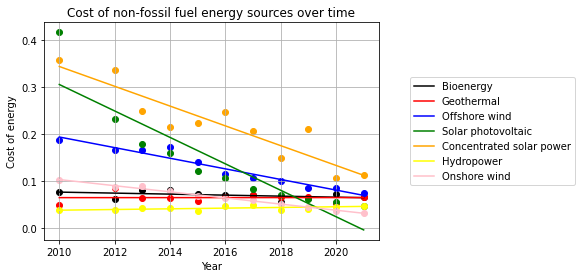

In [28]:
#Fit the regressions model  with existing data and make a plot
fig = plt.figure()
fig, ax = plt.subplots()

linear_regressor.fit(x, bio_y)
plt.scatter(x, bio_y,  color='black')
plt.plot(x, linear_regressor.predict(x), color='black', label="Bioenergy")

linear_regressor.fit(x, geo_y)
plt.scatter(x, geo_y,  color='red')
plt.plot(x, linear_regressor.predict(x), color='red', label="Geothermal")

linear_regressor.fit(x, off_wind_y)
plt.scatter(x, off_wind_y,  color='blue')
plt.plot(x, linear_regressor.predict(x), color='blue', label="Offshore wind")

linear_regressor.fit(x, solar_phot_y)
plt.scatter(x, solar_phot_y,  color='green')
plt.plot(x, linear_regressor.predict(x), color='green', label="Solar photovoltaic")

linear_regressor.fit(x, con_solar_y)
plt.scatter(x, con_solar_y, color='orange')
plt.plot(x, linear_regressor.predict(x), color='orange', label="Concentrated solar power")

linear_regressor.fit(x, hydro_y)
plt.scatter(x, hydro_y, color='yellow')
plt.plot(x, linear_regressor.predict(x), color='yellow', label="Hydropower")

linear_regressor.fit(x, on_wind_y)
plt.scatter(x, on_wind_y, color='pink')
plt.plot(x, linear_regressor.predict(x), color='pink', label="Onshore wind")

ax.grid(True)
ax.set_ylabel("Cost of energy")
ax.set_xlabel("Year")
ax.set_title("Cost of non-fossil fuel energy sources over time")
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))

So to answer the question:\
**3. Which non-fossil fuel energy technology will have the best price in the future?**\
Looking at the figure I can conclude that Solar photovaltaic energy technology will have te best price in the future because this energy source has the lowest cost compared to the othere non-fossil fuel energy sources. Add can therefore in all probability be offered against the best price in the future. 

